In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis
from scipy.stats import boxcox

In [2]:
# Load the dataset
df = pd.read_csv('house_price.csv')

### 1. Perform basic EDA

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [6]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [7]:
df.shape

(13200, 7)

In [8]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

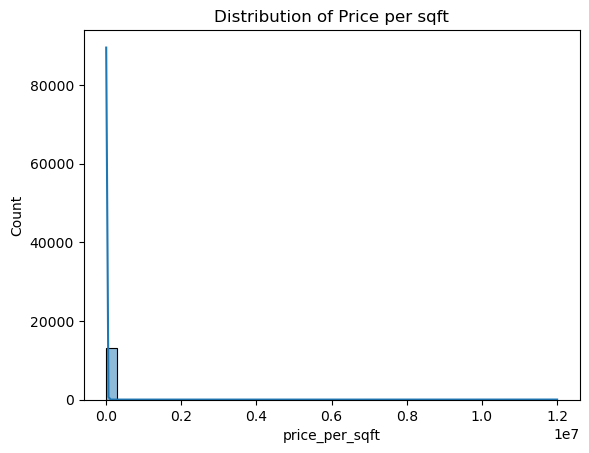

In [9]:
# Histogram of price per sqft
sns.histplot(df["price_per_sqft"], bins=40, kde=True)
plt.title('Distribution of Price per sqft')
plt.show()

#### Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 

In [10]:
# a. Mean and Standard deviation
mean = df['price_per_sqft'].mean()
mean

7920.336742424242

In [11]:
std = df['price_per_sqft'].std()
std

106727.16032810845

In [12]:
df_mean_std = df[(df['price_per_sqft'] >= mean -3*std) & (df['price_per_sqft'] <= mean + 3*std)]
df_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [13]:
# b. Percentile Method
q1, q2 = df['price_per_sqft'].quantile([.05, .95])
df_percentile = df[df['price_per_sqft'].between(q1, q2)]

In [14]:
# c. Interquartile Range(IQR) Method
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

df_IQR = df[(df["price_per_sqft"] >= Q1 - 1.5 * IQR) & (df["price_per_sqft"] <= Q3 + 1.5 * IQR)]

In [15]:
# d. Z-Score Method
df['zscore'] = zscore(df['price_per_sqft'])
df_zscore = df[(df['zscore'] > -3) & (df['zscore'] < 3)]
df_zscore = df_zscore.drop('zscore', axis=1)

#### Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data

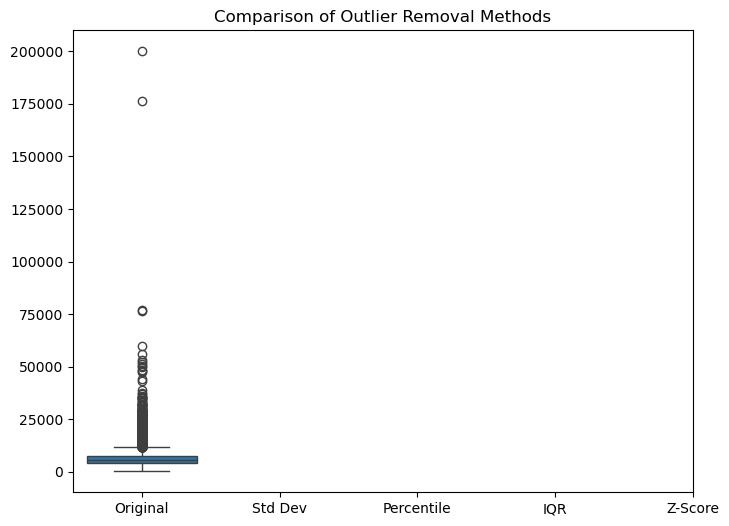

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[df["price_per_sqft"], df_mean_std["price_per_sqft"], df_percentile["price_per_sqft"],
                  df_IQR["price_per_sqft"], df_zscore["price_per_sqft"]])
plt.xticks([0, 1, 2, 3, 4], ["Original", "Std Dev", "Percentile", "IQR", "Z-Score"])
plt.title('Comparison of Outlier Removal Methods')
plt.show()

#### Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

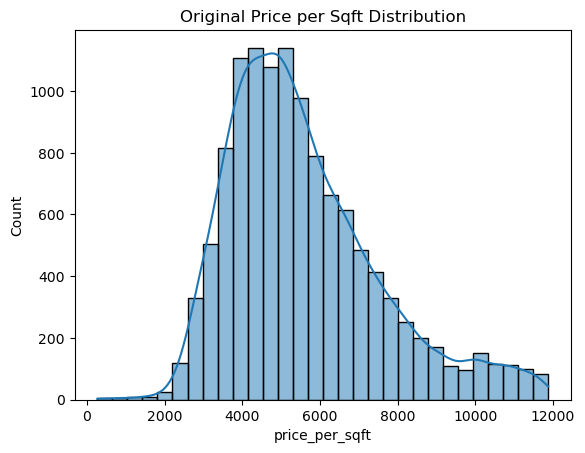

In [19]:
sns.histplot(df_IQR['price_per_sqft'], bins=30,kde=True)
plt.title('Original Price per Sqft Distribution')
plt.show()

In [31]:
df_IQR = df_IQR.copy()
df_IQR.loc[:, "price_per_sqft_log"] = np.log1p(df_IQR["price_per_sqft"])

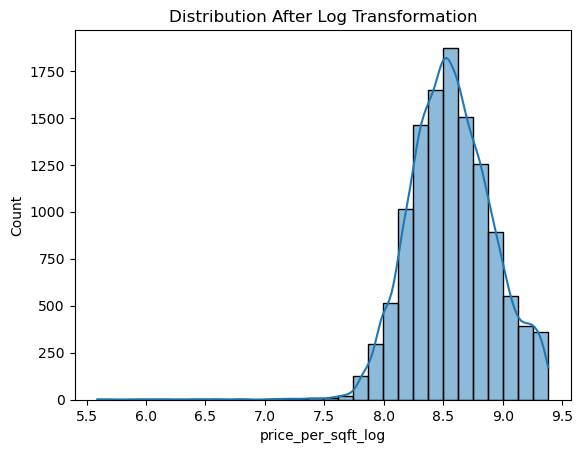

After Log Transformation - Skewness: -0.12988210833124453
After Log Transformation - Kurtosis: 1.3369230684904956


In [32]:
sns.histplot(df_IQR["price_per_sqft_log"], bins=30, kde=True)
plt.title("Distribution After Log Transformation")
plt.show()

print("After Log Transformation - Skewness:", skew(df_IQR["price_per_sqft_log"]))
print("After Log Transformation - Kurtosis:", kurtosis(df_IQR["price_per_sqft_log"]))

#### Q5. Check the correlation between all the numerical columns and plot heatmap. 

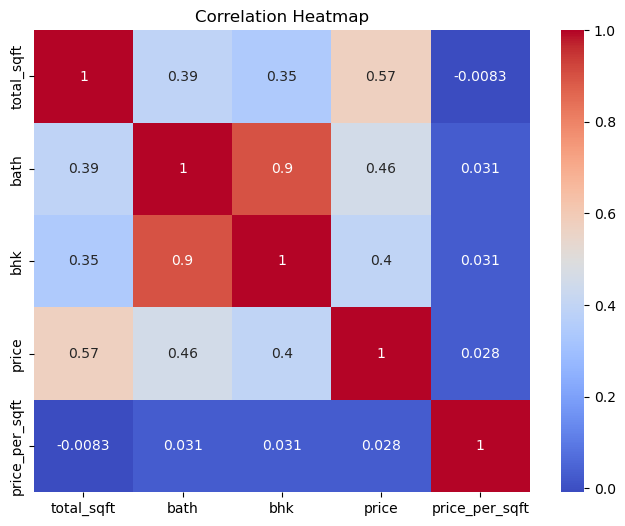

In [33]:
numerical_cols = ['total_sqft', 'bath', 'bhk', 'price', 'price_per_sqft']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Q6. Draw Scatter plot between the variables to check the correlation between them. 

In [ ]:
sns.scatterplot(x=df_IQR["total_sqft"], y=df_IQR["price_per_sqft"])
plt.title("Total Sqft vs Price per Sqft")
plt.show()